## SOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Definiendo las condiciones iniciales
def fa(x):
    return np.cos(2 * x)

def fb(x):
    return np.cos(2 * x) + np.sin(2)

def fc(y):
    return np.sin(2 * y) + 1

def fd(y):
    return np.sin(2 * y) + np.cos(2)

def f(x, y):
    return 0

a, b = 0, 1
c, d = 0, 1

nx, ny = 5, 10

maxiter = 5000
tol = 1e-7


In [ ]:
# Función SOR
def SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, f, maxiter, tol, w):
    x = np.linspace(a, b, nx + 1)
    y = np.linspace(c, d, ny + 1)
    h = (b - a) / nx
    k = (d - c) / ny
    U = np.zeros((ny + 1, nx + 1))

    lamda = k / h

    U[0, :] = fa(x)
    U[-1, :] = fb(x)
    U[:, 0] = fc(y)
    U[:, -1] = fd(y)

    iter = 1
    error = tol + 1
    V = np.copy(U)

    while iter < maxiter and error > tol:
        for j in range(1, ny):
            for i in range(1, nx):
                V[j, i] = (1 / (-4*k**2 +2+2*lamda**2))*(lamda**2 *(V[j, i-1] + U[j, i+1]) +  (V[j-1,i] + U[j+1,i]))
                V[j, i] = (1 - w) * U[j, i] + w * V[j, i]
        error = np.max(np.abs(U - V))
        U = np.copy(V)
        iter += 1

    return x, y, U, iter, error


In [ ]:

# Probando para diferentes valores de w
w_values = []
iters_values = []
for w in np.arange(0, 2.1, 0.1):
    x, y, U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, f, maxiter, tol, w)
    w_values.append(w)
    iters_values.append(iters)
    print(f"w = {w:.1f} \t iters = {iters} \t error = {error:.2e}")


w = 0.0 	 iters = 2 	 error = 0.00e+00
w = 0.1 	 iters = 1788 	 error = 9.97e-08
w = 0.2 	 iters = 902 	 error = 9.93e-08
w = 0.3 	 iters = 590 	 error = 9.80e-08
w = 0.4 	 iters = 428 	 error = 9.77e-08
w = 0.5 	 iters = 328 	 error = 9.77e-08
w = 0.6 	 iters = 260 	 error = 9.65e-08
w = 0.7 	 iters = 210 	 error = 9.76e-08
w = 0.8 	 iters = 172 	 error = 9.65e-08
w = 0.9 	 iters = 142 	 error = 9.34e-08
w = 1.0 	 iters = 117 	 error = 9.57e-08
w = 1.1 	 iters = 96 	 error = 9.79e-08
w = 1.2 	 iters = 78 	 error = 9.76e-08
w = 1.3 	 iters = 62 	 error = 9.43e-08
w = 1.4 	 iters = 47 	 error = 8.21e-08
w = 1.5 	 iters = 29 	 error = 7.67e-08
w = 1.6 	 iters = 38 	 error = 8.09e-08
w = 1.7 	 iters = 51 	 error = 9.09e-08
w = 1.8 	 iters = 78 	 error = 8.77e-08
w = 1.9 	 iters = 163 	 error = 7.81e-08
w = 2.0 	 iters = 5000 	 error = 1.91e+00


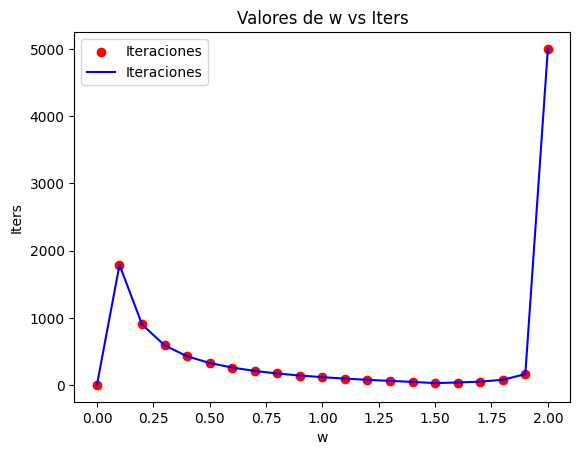

In [ ]:
# Crear una gráfica de dispersión para los valores de w vs iteraciones
plt.scatter(w_values, iters_values, color='red', label='Iteraciones')

# Crear una gráfica de línea para los valores de w vs iteraciones
plt.plot(w_values, iters_values, color='blue', linestyle='-', label='Iteraciones')

# Etiquetas y título del gráfico
plt.xlabel('w')
plt.ylabel('Iters')
plt.title('Valores de w vs Iters')
plt.legend()
plt.show()


In [ ]:
# Ejecutar el método SOR con w = 1.5
w = 1.5
x, y, U, iters, error = SOR(fa, fb, fc, fd, a, b, c, d, nx, ny, f, maxiter, tol, w)

print(U)


[[ 1.          0.92106099  0.69670671  0.36235775 -0.02919952 -0.41614684]
 [ 1.19866933  1.12084151  0.89669176  0.5620358   0.16993535 -0.21747751]
 [ 1.38941834  1.31236885  1.08843569  0.7535935   0.36110089 -0.02672849]
 [ 1.56464247  1.48812233  1.26436939  0.92942003  0.53665658  0.14849564]
 [ 1.71735609  1.64115909  1.41752737  1.08252326  0.68959538  0.30120925]
 [ 1.84147098  1.76540817  1.54182739  1.20680653  0.81381495  0.42532415]
 [ 1.93203909  1.85592041  1.63231431  1.29731021  0.90435672  0.51589225]
 [ 1.98544973  1.90906769  1.68535818  1.35040884  0.95760197  0.56930289]
 [ 1.9995736   1.92268415  1.69879767  1.36395549  0.97141621  0.58342677]
 [ 1.97384763  1.89614249  1.67202418  1.33736821  0.94523633  0.55770079]
 [ 1.90929743  1.83035842  1.60600414  1.27165518  0.8800979   0.49315059]]


In [ ]:
# Imprimir el número de iteraciones y el error
print(f"Número de iteraciones: {iters}")
print(f"Error: {error}")


Número de iteraciones: 29
Error: 7.665382084631744e-08


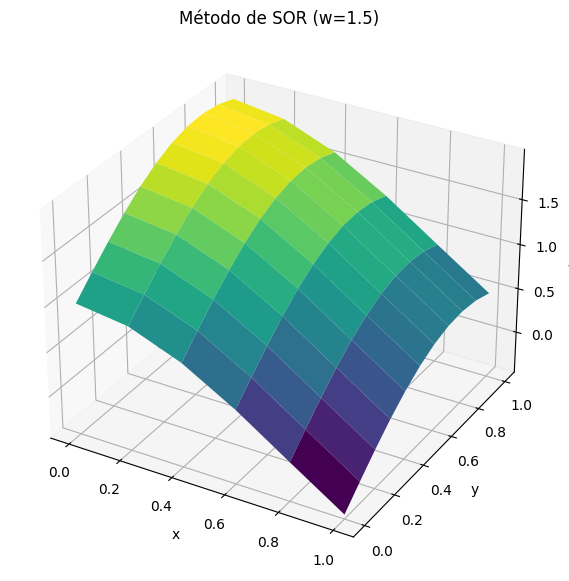

In [ ]:
# Graficando la solución aproximada
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, U, cmap='viridis')

ax.set_title("Método de SOR (w=1.5)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U(x,y)")

plt.show()


## Comprobando con la solución real

$$U(x,y) = sin(2y) + cos(2x)$$

Definiendo $x$, $y$ y $F(x,y)$ como la solución verdadera.

In [ ]:
import numpy as np

# Definiendo x, y y F(x,y) como la solución verdadera
x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 11)

def F(x, y):
    return np.sin(2 * y) + np.cos(2 * x)

# Mostrar x, y y F(x,y)
print("x:", x)
print("y:", y)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

print("F(x,y):")
print(Z)


x: [0.  0.2 0.4 0.6 0.8 1. ]
y: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
F(x,y):
[[ 1.          0.92106099  0.69670671  0.36235775 -0.02919952 -0.41614684]
 [ 1.19866933  1.11973032  0.89537604  0.56102709  0.16946981 -0.21747751]
 [ 1.38941834  1.31047934  1.08612505  0.7517761   0.36021882 -0.02672849]
 [ 1.56464247  1.48570347  1.26134918  0.92700023  0.53544295  0.14849564]
 [ 1.71735609  1.63841708  1.4140628   1.07971385  0.68815657  0.30120925]
 [ 1.84147098  1.76253198  1.53817769  1.20382874  0.81227146  0.42532415]
 [ 1.93203909  1.85310008  1.6287458   1.29439684  0.90283956  0.51589225]
 [ 1.98544973  1.90651072  1.68215644  1.34780748  0.95625021  0.56930289]
 [ 1.9995736   1.9206346   1.69628031  1.36193136  0.97037408  0.58342677]
 [ 1.97384763  1.89490862  1.67055434  1.33620539  0.94464811  0.55770079]
 [ 1.90929743  1.83035842  1.60600414  1.27165518  0.8800979   0.49315059]]


In [ ]:
import numpy as np

# Definiendo x, y y F(x,y) como la solución verdadera
x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 11)

def F(x, y):
    return np.sin(2 * y) + np.cos(2 * x)

# Crear la matriz P y llenarla con los valores reales
P = np.zeros((len(y), len(x)))

for j in range(len(y)):
    for i in range(len(x)):
        P[j, i] = F(x[i], y[j])

# Mostrar la tabla de valores de la solución real
print("Tabla de valores de la solución real P:")
print(P)


Tabla de valores de la solución real P:
[[ 1.          0.92106099  0.69670671  0.36235775 -0.02919952 -0.41614684]
 [ 1.19866933  1.11973032  0.89537604  0.56102709  0.16946981 -0.21747751]
 [ 1.38941834  1.31047934  1.08612505  0.7517761   0.36021882 -0.02672849]
 [ 1.56464247  1.48570347  1.26134918  0.92700023  0.53544295  0.14849564]
 [ 1.71735609  1.63841708  1.4140628   1.07971385  0.68815657  0.30120925]
 [ 1.84147098  1.76253198  1.53817769  1.20382874  0.81227146  0.42532415]
 [ 1.93203909  1.85310008  1.6287458   1.29439684  0.90283956  0.51589225]
 [ 1.98544973  1.90651072  1.68215644  1.34780748  0.95625021  0.56930289]
 [ 1.9995736   1.9206346   1.69628031  1.36193136  0.97037408  0.58342677]
 [ 1.97384763  1.89490862  1.67055434  1.33620539  0.94464811  0.55770079]
 [ 1.90929743  1.83035842  1.60600414  1.27165518  0.8800979   0.49315059]]


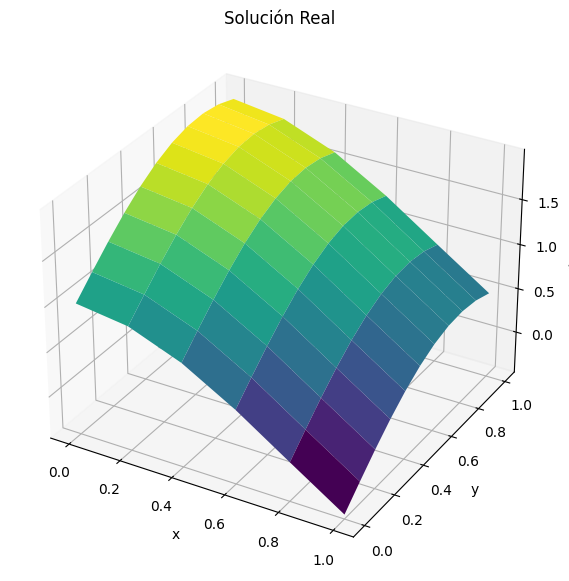

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definiendo x, y y F(x,y) como la solución verdadera
x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 11)
X, Y = np.meshgrid(x, y)

def F(x, y):
    return np.sin(2 * y) + np.cos(2 * x)

# Crear la matriz P y llenarla con los valores reales
P = F(X, Y)

# Crear la gráfica de superficie
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, P, cmap='viridis')

ax.set_title("Solución Real")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U(x,y)")

# Mostrar la gráfica
plt.show()


In [ ]:
# Calcular la diferencia absoluta entre P y U
difference = np.abs(P - U)

# Mostrar la diferencia
print("Diferencia absoluta entre la solución real y la aproximada:")
print(difference)


Diferencia absoluta entre la solución real y la aproximada:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.00111119 0.00131572 0.00100871 0.00046554 0.        ]
 [0.         0.00188951 0.00231063 0.00181741 0.00088207 0.        ]
 [0.         0.00241887 0.00302021 0.0024198  0.00121363 0.        ]
 [0.         0.002742   0.00346457 0.00280941 0.00143881 0.        ]
 [0.         0.00287619 0.00364969 0.00297779 0.00154349 0.        ]
 [0.         0.00282033 0.00356851 0.00291337 0.00151716 0.        ]
 [0.         0.00255697 0.00320174 0.00260135 0.00135177 0.        ]
 [0.         0.00204955 0.00251736 0.00202414 0.00104212 0.        ]
 [0.         0.00123386 0.00146984 0.00116283 0.00058822 0.        ]
 [0.         0.         0.         0.         0.         0.        ]]
